* ref: ARIMA ebook : https://otexts.com/fppkr/arima.html
* ref: 시계열 허와 실 : https://m.blog.naver.com/bluefish850/220725222798
* ref :SAS :  https://m.blog.naver.com/hsj2864/220892642198

# 1. 시계열 분석이란

### 1) 정의 
* 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법 
* 과거의 패턴이 미래에도 지속된다는 데이터의 안정성이 기본적인 가정으로 필요

### 2) 시계열 패턴

* <font color=red> $T$ </font> 추세(trend) : 데이터가 장기적으로 증가하거나 감소하는 패턴
* <font color=red> $S$ </font>계절성(seasonality) : 주, 월, 분기, 반기 단위 등 특정 시간의 주기로 나타나는 패턴
* <font color=red> $C$ </font>주기성(cycle) : 경기변동과 같이 정치, 경제, 사회적 요인에 의한 변화로,일정 주기가 없으며 장기적인 변화 현상
* <font color=red> $R$ </font> 불규칙요소(Random, Residual) : 추세, 순환, 계절성은 뺀 나머지, 돌발적인 요인에 의하여 일어나는 변화로, 예측 불가능한 임이의 변동


### 3) 시계열 패턴 분해
* <b>덧셈 분해(additive decomposition)</b>&nbsp; Trend와 Seasonal이 별개, $ y_t = S_t+T_t+R_t $
* <b>곱셈 분해(multiplicative decomposition)</b>&nbsp; Trend에 따라 Seasonal이 변화,  $ y_t = S_t*T_t*R_t $ , 데이터에 0이 존재해서는 안된다.

<font color='blue'>
Additive : 시간에 지남에 따라(Trend가 변화함에 따라) 변동폭이 일정&nbsp; &nbsp; &nbsp; &nbsp;
Multiplicative : Trend가 상승함에 따라 변동폭 증가 </font>
<img src=./img/img33.png>


### 4) 정상성
* 시간에 따른 평균&분산이 일정한 패턴


### <font color=red> 5) 비정상성 데이터를 정상성(평균,분산 일정)으로 만드는 방법
*  <font color=red>변동폭이 일정하지 않은 경우 : 로그 변환</font>
*  <font color=red>추세, 계절성이 존재하는 경우 : 차분(y_t - y_{t-1}) </font>

<pre>
* (a)와 같이 시간에 따라 변동폭이 일정하지 않고, 추세와 계절적 영향이 존재하는 비정상 시계열 데이터
* (b)로그변환 --> 변동폭 일정
* (c)차분 --> 평균 일정
* (d)로그변환+차분 --> 평균과 분산이 일정한 정상 시계열로 변환
</pre>
<img src=./img/img3.png>

# 2. 시계열 모델

### AR(Autoregression) 자기상관 모델
* <font color=red> 이전의 자신의 관측값을 이용하여 미래의 값을 예측하는 모델 --> 자기 자신의 과거를 사용(자기상관성)</font>
* $Y_t = (Y_{t-1} * w) + …  +c + (e_t * u)$
*  e(t) : white-noise(백색 잡음)  : 일반적인 정규분포(평균이 0, 분산이 1인 정규분포)에서 도출된 random noise 값
*  (X(t-1) * w) + b을 평균으로 가지며 u만큼을 분산으로 가지는 정규분포를 따른다

### MA(Moving Average) 이동평균 모델
* <font color=red>이전 관측값의 예측 오차(e(t-1))를 이용하여 미래 값을 예측하는 모델</font>
* 데이터의 평균값이 시간에 따라 변화하는 추이 
* $Y_t = (e_{t-1} * w) + …  +c + (e_t)$



### ARMA(Autoregressive Moving Average) 모델
* AR + MA 결합
*![image.png] https://t1.daumcdn.net/cfile/tistory/99EAB33A5C39D1AD27

### ARIMA(p, d, q) 모수 설정
* <font color=red>d차 차분한 데이터에 AR과 MA 모형을 합친 모델 --> AR모형의 Lag : p,  MA모형의 Lag : q, 차분(Diffrence)횟수 : d </font>
* AR(p) = ARIMA(p, 0, 0)
* MA(q) = ARIMA(0, 0, q)
* ARMA(p, q) = ARIMA(p, 0, q)

<img src=./img/img2.png>

# 3. 최적의 p, q 찾기 

<h3>ACF(Autocorrelation function) :자기상관함수 </h3>
<pre>
* 시차에 따른 관측치들 사이의 관련성(자기상관성)을 측정하는 함수
* 정상계열: 빠르게 0에 수렴, 비정상계열:천천히 감소
</pre>

<h3>PACF(Partial autocorrelation function) :편자기상관함수 </h3>
<pre>
* k 이외의 모든 다른 시점 관측치의 영향력을 배제하고  y_t와 y_t_k 두 관측치의 관련성을 측정하는 함수 </pre>

---
* AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 시차 p이후 급격히 감소
* MA의 특성을 띄는 경우, ACF는 시차 q이후 급격히 감소하고 PACF는 천천히 감소
* 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용


<table><tr>
<td>
<img src='https://dinonotes.com/wp-content/uploads/2021/06/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7-2021-06-11-%EC%98%A4%EC%A0%84-12.24.38-768x583.png'>
</td>
<td>
<img src='https://dinonotes.com/wp-content/uploads/2021/06/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7-2021-06-11-%EC%98%A4%EC%A0%84-12.25.15-768x582.png'>
</td>
<td>
<img src='https://dinonotes.com/wp-content/uploads/2021/06/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7-2021-06-11-%EC%98%A4%EC%A0%84-12.25.52-768x578.png'>
</td></tr></table><br>
<img src=./img/img4.png width=1200>

# Quiz?
<img src=./img/img5.png>

# 4. [실습] ARIMA를 활용한 비트코인 가격 예측

In [1]:
import pandas as pd

sr = pd.read_csv('market-price.csv', header=0, index_col='Timestamp', squeeze=True)
sr.head()

Timestamp
2021-03-30 00:00:00    57627.67
2021-03-31 00:00:00    58730.13
2021-04-01 00:00:00    58735.25
2021-04-02 00:00:00    58736.92
2021-04-03 00:00:00    59031.32
Name: market-price, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

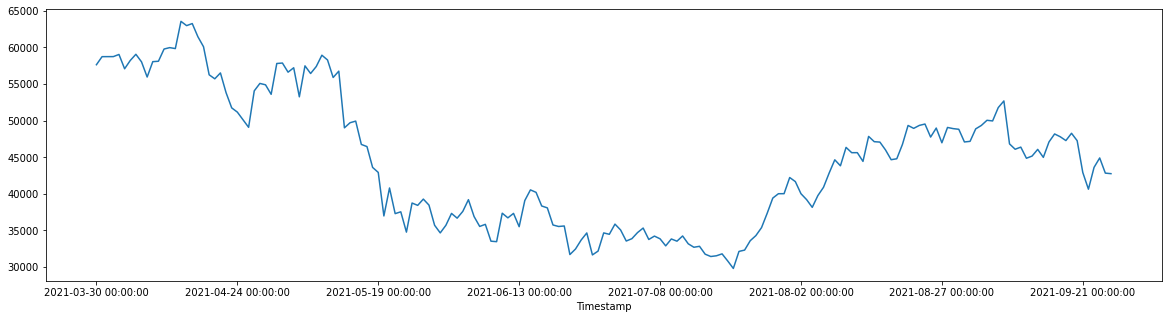

In [2]:
sr.plot(figsize=(20,5))

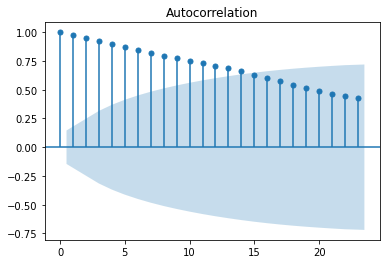

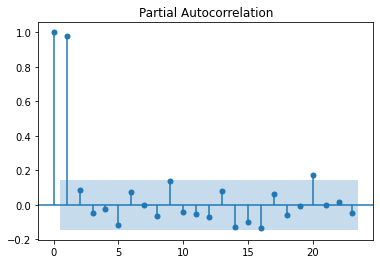

In [3]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sr)
plot_pacf(sr)   # Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 15 must be < 15.
plt.show()

 PACF는 1의 Time lag에서 약 0.99를 보이고 이후에 급격히 감소 --> MA성격의 데이터  p=0, q=1

### 차분 계산

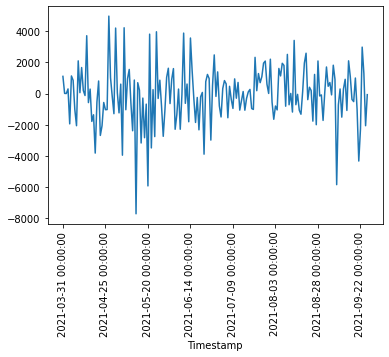

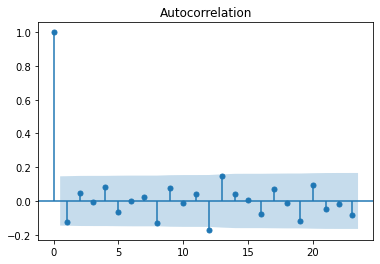

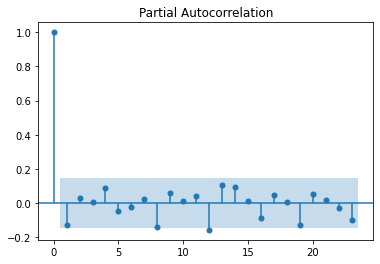

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1 = sr.diff(periods=1).iloc[1:]
diff_1.plot()
plt.xticks(rotation =90)
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

ACF와 PACF를 모두 시계열이 정상상태(Stationary) --> 즉 차분 1

### 모형구축  : ARIMA(0,1,1)

In [5]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

model = ARIMA(sr, order=(0,1,1))
arima_res = model.fit(trend='c', full_output=True, disp=1)
print(arima_res.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                  180
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1610.413
Method:                       css-mle   S.D. of innovations           1858.939
Date:                Sun, 26 Sep 2021   AIC                           3226.826
Time:                        23:27:10   BIC                           3236.405
Sample:                    03-31-2021   HQIC                          3230.710
                         - 09-26-2021                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -82.9440    122.387     -0.678      0.498    -322.819     156.931
ma.L1.D.market-price    -0.1174      0.070     -1.668      0.095      -0.255       0.021
            

* P>|z| (p-value) : 학습의 적정성 평가
* 0.05 이상:  MA(1) 계수, 모형의 Constant 모두 유효
* nc : 0.103 , c : -0.255  --> nc사용한 경우  t-test값이 더 좋아짐

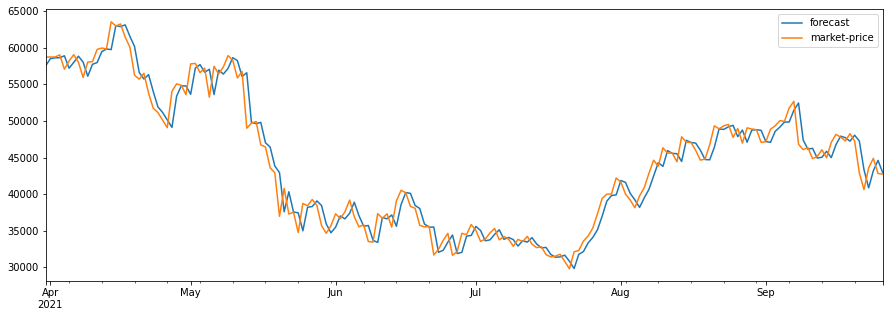

In [10]:
pig, ax = plt.subplots(figsize=(15,5))
arima_res.plot_predict(ax=ax)
plt.show()

In [7]:
import numpy as np

In [11]:
fore = arima_res.forecast(steps=1)
#  예측값, stderr,   upper bound~lower bound 
print(fore)
print(np.array(fore[0])/1000)

(array([42682.64625236]), array([1858.93878232]), array([[39039.19318955, 46326.09931517]]))
[42.68264625]


* RIMA모형은 9월 23일의 비트코인 가격을 42.682 달러로 예측

<img src=./img/img.png>